<h1>Анализ Данных о Продажах</h1>

<h3>VOLODYMYR CHUBAI</h3>
https://www.linkedin.com/in/volodymyr-chubai/

## Сценарий проекта
Я Junior Data Analyst, работаю в команде аналитиков данных. Меня попросили сосредоточиться на данных о продажах продуктов и проанализировать эти данные, чтобы понять, какие продукты покупают клиенты, и ответить на другие вопросы. Ответы на эти вопросы помогут определить дальнейшую стратегию компании.

## 1. ASK

### Вопросы:
* Сколько было заработано в этом году?
* Какой месяц был лучшим по продажам? Сколько было заработано в этом месяце? 
* В каком городе было больше всего продаж?
* В какое время мы должны показывать рекламу, чтобы максимизировать вероятность того, что клиент купит продукт?
* Какие продукты чаще всего продаются вместе?
* Какой товар продается больше всего?

### Какова вероятность?
* что другие люди будут заказывать зарядный кабель USB-C?
* что другие люди будут заказывать iPhone? 
* что другие люди будут заказывать Google Phone? 
* что другие люди будут заказывать проводные наушники?

## 2. PREPARE
### Источник данных
Используемые данные были взяты из следующего общедоступного набора данных: [Sales Product Data](https://www.kaggle.com/datasets/knightbearr/sales-product-data) 

Данные общедоступны на Kaggle и хранятся в 12 CSV-файлах.

### Собранные данные включают
`Order ID` - Идентификатор заказа это система счисления, которую Amazon использует исключительно для отслеживания заказов. Каждый заказ получает свой идентификатор заказа, который не будет дублироваться. Этот номер может быть полезен продавцу, когда он пытается узнать определенные детали заказа, такие как дата отправки или статус.

`Product` - Товар, который был продан.

`Quantity Ordered` - Заказанное количество — это общее количество заказанного товара в первоначальном заказе (без каких-либо изменений).

`Price Each` - Цена каждого товара.

`Order Date` - Это дата, когда клиент запрашивает отправку заказа.

`Purchase Address` - Заказ на покупку подготавливается покупателем, часто через отдел закупок. Заказ на поставку, или ЗП, обычно включает номер ЗП, который полезен для сопоставления отгрузок с покупками; дата отгрузки; Адрес для выставления счета; Адрес доставки; и позиции запроса, количество и цена.

## 3. PROCESS
### Подготовка рабочей среды
Я буду использовать Python для очистки, преобразования и визуализации данных. Установлены следующие библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Импорт наборов данных

In [2]:
df_january = pd.read_csv("/Users/volodymyrchubay/Desktop/Kaggle/Sales Product Data/Sales_January_2019.csv")
df_february = pd.read_csv("/Users/volodymyrchubay/Desktop/Kaggle/Sales Product Data/Sales_February_2019.csv")
df_march = pd.read_csv("/Users/volodymyrchubay/Desktop/Kaggle/Sales Product Data/Sales_March_2019.csv")
df_april = pd.read_csv("/Users/volodymyrchubay/Desktop/Kaggle/Sales Product Data/Sales_April_2019.csv")
df_may = pd.read_csv("/Users/volodymyrchubay/Desktop/Kaggle/Sales Product Data/Sales_May_2019.csv") 
df_june = pd.read_csv("/Users/volodymyrchubay/Desktop/Kaggle/Sales Product Data/Sales_June_2019.csv") 
df_july = pd.read_csv("/Users/volodymyrchubay/Desktop/Kaggle/Sales Product Data/Sales_July_2019.csv") 
df_august = pd.read_csv("/Users/volodymyrchubay/Desktop/Kaggle/Sales Product Data/Sales_August_2019.csv") 
df_september = pd.read_csv("/Users/volodymyrchubay/Desktop/Kaggle/Sales Product Data/Sales_September_2019.csv") 
df_october = pd.read_csv("/Users/volodymyrchubay/Desktop/Kaggle/Sales Product Data/Sales_October_2019.csv") 
df_november = pd.read_csv("/Users/volodymyrchubay/Desktop/Kaggle/Sales Product Data/Sales_November_2019.csv") 
df_december = pd.read_csv("/Users/volodymyrchubay/Desktop/Kaggle/Sales Product Data/Sales_December_2019.csv") 

### Просмотр данных

In [3]:
df_january.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


### Объединение данных о продажах за 12 месяцев в один CSV файл

In [4]:
df = pd.concat([df_january, df_february, df_march, df_april, df_may, df_june, df_july, df_august, df_september, df_october, df_november, df_december])
df = pd.DataFrame(df)
df.to_csv("all_data.csv", index = False)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


### Проверка данных

In [5]:
df.shape

(186850, 6)

In [6]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"
25116,319670,Bose SoundSport Headphones,1,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001"


In [7]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [9]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [10]:
df[['Order ID', 'Product', 'Order Date', 'Purchase Address']].describe()

,Order ID,Product,Order Date,Purchase Address
count,186305,186305,186305,186305
unique,178438,20,142396,140788
top,Order ID,USB-C Charging Cable,Order Date,Purchase Address
freq,355,21903,355,355


### Очистка данных
Поиск нулевых значений

In [11]:
# количество отсутствующих данных в каждом столбце
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [12]:
nan_df = df[df.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
22945,NaN,NaN,NaN,NaN,NaN,NaN
22962,NaN,NaN,NaN,NaN,NaN,NaN
23309,NaN,NaN,NaN,NaN,NaN,NaN
23996,NaN,NaN,NaN,NaN,NaN,NaN


#### Удаление нулевых значений

In [13]:
df = df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [14]:
# ValueError: invalid literal for int() with base 10: 'Or'
df = df[df['Order Date'].str[0:2] != 'Or']

### Преобразование столбцов 'Quantity Ordered' и 'Price Each'

In [15]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [16]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32')
df['Price Each'] = df['Price Each'].astype('float32')

### Добавление столбца 'Month'

In [17]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


### Преобразование столбца 'Order Date' в datetime

In [18]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [19]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float32
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
dtype: object

## 4. ANALYSE
На этом этапе я буду выполнять некоторые расчеты, чтобы получить представление и выявить тенденции на основе данных. А также отвечу на поставленные мне вопросы.

### Вопрос 1: Сколько было заработано в этом году?

In [20]:
df['Revenue'] = round(df['Quantity Ordered'] * df['Price Each'], 2)

In [21]:
total_revenue = round(df['Revenue'].sum(), 2)
total_revenue

34492035.97

#### Вопрос 1: Сколько было заработано в этом году?
> Общая выручка в этом году составила 34 492 035$

### Вопрос 2: Какой месяц был лучшим по продажам? Сколько было заработано в этом месяце?

In [29]:
monthly_revenue = df.groupby('Month').sum()
monthly_revenue = pd.DataFrame(monthly_revenue[['Revenue', 'Quantity Ordered']])
monthly_revenue

,Revenue,Quantity Ordered
Month,,
1,1822256.73,10903
2,2202022.42,13449
3,2807100.38,17005
4,3390670.24,20558
5,3152606.75,18667
6,2577802.26,15253
7,2647775.76,16072
8,2244467.88,13448
9,2097560.13,13109


In [30]:
df_december = df.query('Month == 12')
december_total_revenue = round(df_december['Revenue'].sum(), 2)

print('Доход за december:   ', december_total_revenue)

Доход за december:    4613443.34


Text(0, 0.5, 'Revenue')

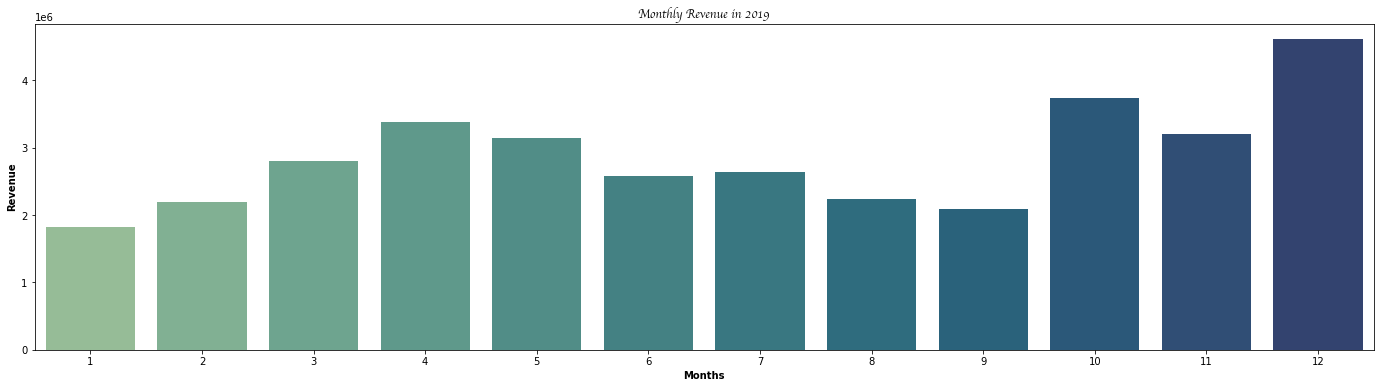

In [31]:
plt.figure(figsize = (24, 6))

sns.barplot(x = monthly_revenue.index, y = monthly_revenue['Revenue'], data = monthly_revenue, palette = 'crest')

plt.title('Monthly Revenue in 2019', fontname = 'cursive', weight = 'bold')
# x-label
plt.xlabel('Months', weight = 'bold')
# y-label
plt.ylabel('Revenue', weight = 'bold')

#### Вопрос 2: Какой месяц был лучшим по продажам? Сколько было заработано в этом месяце?
> Как мы видим из сгенерированной выше гистограммы, декабрь является самым прибыльным месяцем с общей суммой 4,613,443$. Также декабрь является самым лучшым месяцем по продажам, в этот месяц было продано 28114 товаров. Скорее всего, это связано с новогодними распродажами.

### Вопрос 3: В каком городе было больше всего продаж?

In [32]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])

In [33]:
city_sales = df.groupby(['City']).sum()
city_sales = pd.DataFrame(city_sales[['Revenue', 'Quantity Ordered']])
city_sales

,Revenue,Quantity Ordered
City,,
Atlanta,2795498.58,16602
Austin,1819581.75,11153
Boston,3661642.01,22528
Dallas,2767975.40,16730
Los Angeles,5452570.80,33289
New York City,4664317.43,27932
Portland,2320490.61,14053
San Francisco,8262203.91,50239
Seattle,2747755.48,16553


Text(0, 0.5, 'Sales(USD)')

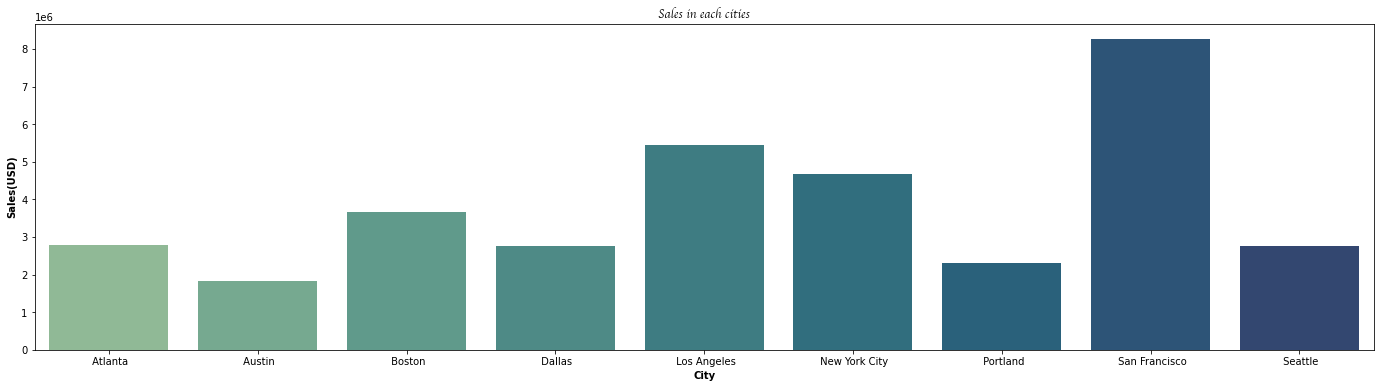

In [34]:
plt.figure(figsize = (24, 6))

sns.barplot(x = city_sales.index, y = city_sales['Revenue'], data = city_sales, palette = 'crest')

plt.title('Sales in each cities', fontname = 'cursive', weight = 'bold')
# x-label
plt.xlabel('City', weight = 'bold')
# y-label
plt.ylabel('Sales(USD)', weight = 'bold')

#### Вопрос 3: В каком городе было больше всего продаж?
> На графике выше видно, что в городе Сан-Франциско самые высокие продажи. За весь год было продано 50 239 товаров, которые были доставлены в город Сан-Франциско, на сумму 8 262 203$

### Вопрос 4: В какое время мы должны показывать рекламу, чтобы максимизировать вероятность того, что клиент купит продукт?

In [35]:
import datetime as dt

In [36]:
df['Hour'] = df['Order Date'].dt.hour

In [37]:
hourly_sales = df.groupby(['Hour']).sum()
hourly_sales = pd.DataFrame(hourly_sales[['Revenue', 'Quantity Ordered']])
hourly_sales

,Revenue,Quantity Ordered
Hour,,
0,713721.27,4428
1,460866.88,2619
2,234851.44,1398
3,145757.89,928
4,162661.01,937
5,230679.82,1493
6,448113.00,2810
7,744854.12,4556
8,1192348.97,7002


Text(0, 0.5, 'number of sales')

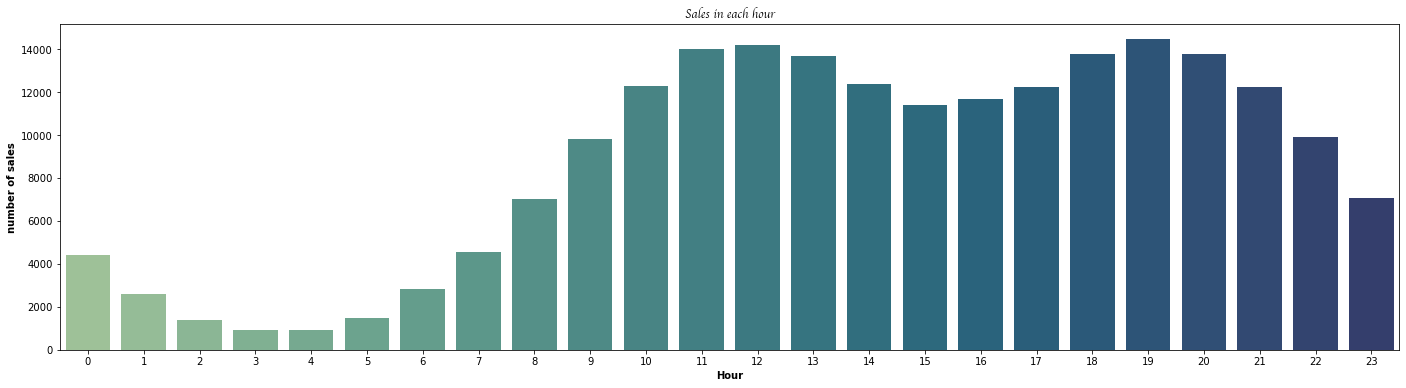

In [38]:
plt.figure(figsize = (24, 6))

sns.barplot(x = hourly_sales.index, y = hourly_sales['Quantity Ordered'], data = hourly_sales, palette = 'crest')

plt.title('Sales in each hour', fontname = 'cursive', weight = 'bold')
# x-label
plt.xlabel('Hour', weight = 'bold')
# y-label
plt.ylabel('number of sales', weight = 'bold')

#### Вопрос 4: В какое время мы должны показывать рекламу, чтобы максимизировать вероятность того, что клиент купит продукт?
> Я бы посоветовал показывать рекламу около 09:00 - 10:00 так как в это время пользователи активно посещяют различные сайты и просматривают рекламу, а после просмотра совершают покупки. Также стоит обратить внимание на вечерние время дня, час пик у нас с 18:00 до 20:00. В это время люди приходят с работы и активно скролят ленту в соц-сетях. Именно поэтому я советую показывать рекламу около 18:00 - 19:00, чтобы максимизировать вероятность того, что клиент купит продукт.

### Вопрос 5: Какие продукты чаще всего продаются вместе?

In [39]:
duplicated_id = df[df['Order ID'].duplicated(keep=False)]
duplicated_id[['Order ID', 'Product']].head(6)

,Order ID,Product
41,141275,USB-C Charging Cable
42,141275,Wired Headphones
57,141290,Apple Airpods Headphones
58,141290,AA Batteries (4-pack)
133,141365,Vareebadd Phone
134,141365,Wired Headphones


In [40]:
duplicated_id['Group'] = duplicated_id.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
duplicated_id[['Order ID', 'Product', 'Group']].head(6)

/var/folders/t2/61lgnyrn60ggkd_14hfd4khm0000gn/T/ipykernel_64468/2022050970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_id['Group'] = duplicated_id.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Product,Group
41,141275,USB-C Charging Cable,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,"Vareebadd Phone, Wired Headphones"
134,141365,Wired Headphones,"Vareebadd Phone, Wired Headphones"


In [41]:
group_df = duplicated_id[['Order ID', 'Group']].drop_duplicates()
group_df.head(10)

,Order ID,Group
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"
228,141457,"iPhone, Apple Airpods Headphones"
250,141478,"Google Phone, Apple Airpods Headphones"
323,141550,"iPhone, Apple Airpods Headphones, Wired Headph..."
362,141587,"USB-C Charging Cable, Apple Airpods Headphones"
421,141645,"Lightning Charging Cable, Wired Headphones"


In [42]:
# Ссылка: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in group_df['Group']:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(7):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220


#### Вопрос 5: Какие продукты чаще всего продаются вместе?
> Чаще всего, вместе продаются 'iPhone' и 'Lightning Charging Cable', а также 'Google Phone' и 'USB-C Charging Cable'

### Вопрос 6: Какой товар продается больше всего?

In [43]:
quantity_ordered = (df.groupby('Product')
            .agg({'Quantity Ordered': 'sum'}))
quantity_ordered

,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


Text(0, 0.5, 'Quantity')

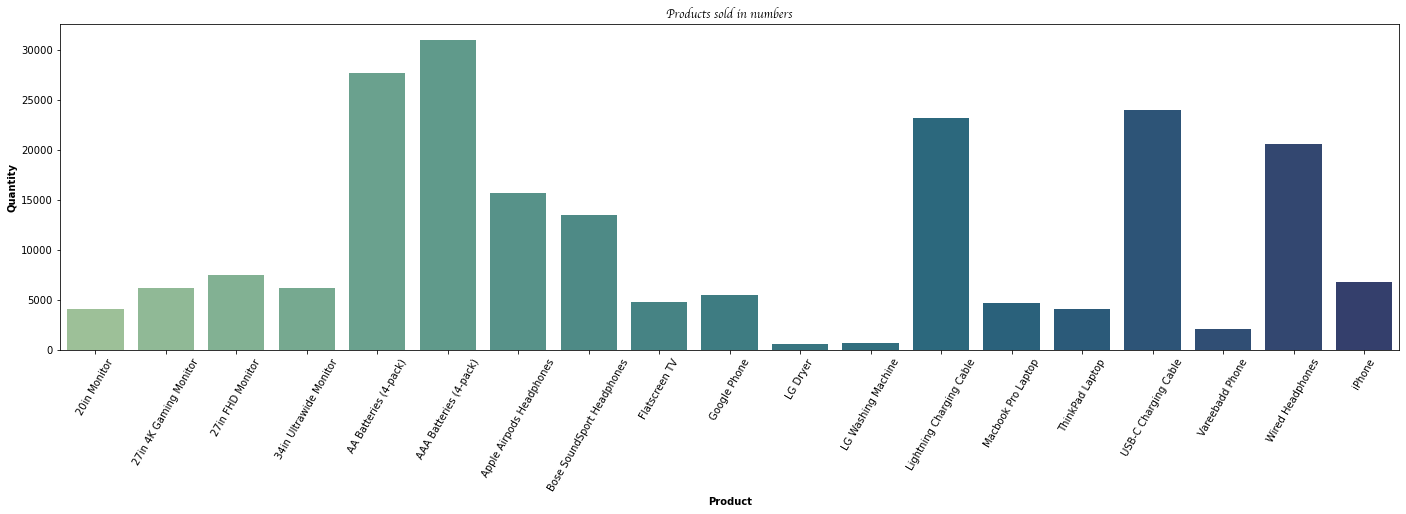

In [44]:
plt.figure(figsize = (24, 6))

sns.barplot(x = quantity_ordered.index, y = quantity_ordered['Quantity Ordered'], data = quantity_ordered, palette = 'crest')

plt.title('Products sold in numbers', fontname = 'cursive', weight = 'bold')
# x-label
plt.xlabel('Product', weight = 'bold')
degrees = 60
plt.xticks(rotation = degrees)
# y-label
plt.ylabel('Quantity', weight = 'bold')

In [45]:
sales_data = (df.groupby('Product')
              .agg({'Quantity Ordered': 'sum', 'Price Each': 'mean'}))
sales_data

,Quantity Ordered,Price Each
Product,,
20in Monitor,4129,109.989998
27in 4K Gaming Monitor,6244,389.989990
27in FHD Monitor,7550,149.990005
34in Ultrawide Monitor,6199,379.989990
AA Batteries (4-pack),27635,3.840000
AAA Batteries (4-pack),31017,2.990000
Apple Airpods Headphones,15661,150.000000
Bose SoundSport Headphones,13457,99.989998
Flatscreen TV,4819,300.000000


In [46]:
sales_data.corr()

,Quantity Ordered,Price Each
Quantity Ordered,1.000000,-0.601443
Price Each,-0.601443,1.000000


(0.0, 34520.15179243352)

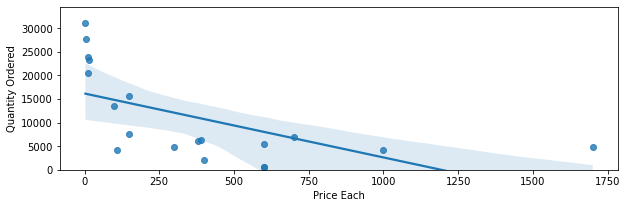

In [47]:
width = 10
height = 3
plt.figure(figsize=(width, height))
sns.regplot(x="Price Each", y="Quantity Ordered", data=sales_data)
plt.ylim(0,)

#### Вопрос 6: Какой товар продается больше всего?
> Больше всего продается 'AAA Batteries (4-pack)', за год было продано 31 017 единиц этого товара.

### Какова вероятность того, что другие люди будут заказывать зарядный кабель USB-C?

In [48]:
df_count = df.value_counts().sum()
df_count

185950

In [49]:
USB = df[df.Product == 'USB-C Charging Cable'].value_counts().sum()

probability_USB = USB / df_count
probability_USB

0.11778972842161871

#### Какова вероятность того, что другие люди будут заказывать зарядный кабель USB-C?
> 12%

### Какова вероятность того, что другие люди будут заказывать iPhone?

In [50]:
iPhone = df[df.Product == 'iPhone'].value_counts().sum()

probability_iPhone = iPhone / df_count
probability_iPhone

0.036794837321860716

#### Какова вероятность того, что другие люди будут заказывать iPhone?
> 4%

### Какова вероятность того, что другие люди будут заказывать Google Phone?

In [51]:
Google_Phone = df[df.Product == 'Google Phone'].value_counts().sum()

probability_Google_Phone = Google_Phone / df_count
probability_Google_Phone

0.029712288249529442

#### Какова вероятность того, что другие люди будут заказывать Google Phone?
> 3%

### Какова вероятность того, что другие люди будут заказывать проводные наушники?

In [52]:
Wired_Headphones = df[df.Product == 'Wired Headphones'].value_counts().sum()

probability_Wired_Headphones = Wired_Headphones / df_count
probability_Wired_Headphones

0.101543425652057

#### Какова вероятность того, что другие люди будут заказывать проводные наушники?
> 10%